In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import statistics as st

In [2]:
df = pd.read_csv("DS1_C6_S4_Credit_Data_Hackathon.csv")

###### Level 0

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [4]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2
99999,216090,0,Revolving loans,M,Y,Y,0,202500.0,337500.0,337500.0,...,-3230,1,1,1,1,0,Drivers,2.0,SATURDAY,0


In [6]:
df.shape

(100000, 24)

In [7]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [9]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,CNT_FAM_MEMBERS,TOTAL_DOC_SUBMITTED
count,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,9.991900e+04,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,99999.000000,100000.000000
mean,158006.140860,0.080930,0.417390,1.694261e+05,5.990034e+05,5.383451e+05,63292.222060,0.999990,0.82128,0.199740,0.997990,0.056190,2.155672,0.931210
std,33481.166996,0.272729,0.721014,3.835007e+05,4.020520e+05,3.693977e+05,140839.697296,0.003162,0.38312,0.399807,0.044788,0.230289,0.908897,0.343917
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,4.500000e+04,-17531.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,129076.750000,0.000000,0.000000,1.125000e+05,2.700000e+05,2.385000e+05,-2758.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,157877.000000,0.000000,0.000000,1.440000e+05,5.130405e+05,4.500000e+05,-1219.000000,1.000000,1.00000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,186982.250000,0.000000,1.000000,2.025000e+05,8.086500e+05,6.795000e+05,-291.000000,1.000000,1.00000,0.000000,1.000000,0.000000,3.000000,1.000000
max,216090.000000,1.000000,12.000000,1.170000e+08,4.050000e+06,4.050000e+06,365243.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14.000000,4.000000


In [10]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [40]:
cat, cont = [], []

for i in df.columns:
    if df[i].nunique() < 25:
        cat.append(i)
    else:
        cont.append(i)

print(tabulate({'Categorical': cat, 'Continuous': cont}, headers = ['Categorical', 'Continuous']))

Categorical          Continuous
-------------------  ----------------
TARGET               SK_ID_CURR
NAME_CONTRACT_TYPE   AMT_INCOME_TOTAL
GENDER               AMT_CREDIT
Car                  AMT_GOODS_PRICE
House                DAYS_EMPLOYED
CNT_CHILDREN
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
MOBILE
WORK_PHONE
HOME_PHONE
MOBILE_REACHABLE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
APPLICATION_DAY
TOTAL_DOC_SUBMITTED


###### Univariate (Level 1)

In [17]:
def catdet(col):
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Most recurring value in {col} is {st.mode(df[col])}")
    print(f"Number of missing values in {col} are {df[col].isnull().sum()}")
    
    percentage = df[col].value_counts()
    label = list(df[col].value_counts().index)

    fig, ax = plt.subplots(1, 2, figsize = (15, 10))
    
    sns.countplot(x = df[col], ax = ax[0])
    ax[0].set_title(f'count of {col}')
    
    plt.pie(percentage, labels = label, autopct = '%.2f%%')
    ax[1].set_title(f'share of {col}')

In [50]:
def condet(col):
    print(f"Mean of {col} is {df[col].mean()}")
    print(f"Median of the {col} is {df[col].median()}")
    print(f"Mode of the {col} is {st.mean(df[col])}")
    print(f"Standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in {col} are {df[col].isnull().sum()}")
    
    fig, ax = plt.subplots(2, 1, figsize = (15, 10))
    
    sns.boxplot(x = df[col], ax = ax[0])
    ax[0].set_title(f'count of {col}')
    
    sns.histplot(x = df[col])
    ax[1].set_title(f'share of {col}')
    
    #fig, ax = plt.subplots(2,1,figsize=(15,7))
    #sns.histplot(x=df[col],ax=ax[0],color='g',edgecolor='black')
    #sns.boxplot(x=df[col],ax=ax[1],color='m')

Unique values in TARGET are: [1 0]
Most recurring value in TARGET is 0
Number of missing values in TARGET are 0


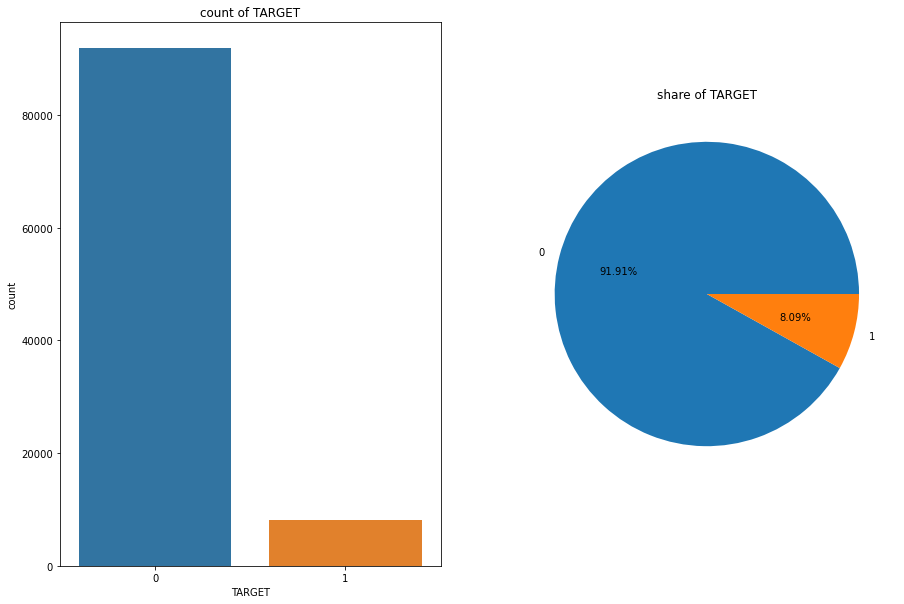

In [136]:
catdet('TARGET') # Target

Unique values in GENDER are: ['M' 'F' 'XNA']
Most recurring value in GENDER is F
Number of missing values in GENDER are 0


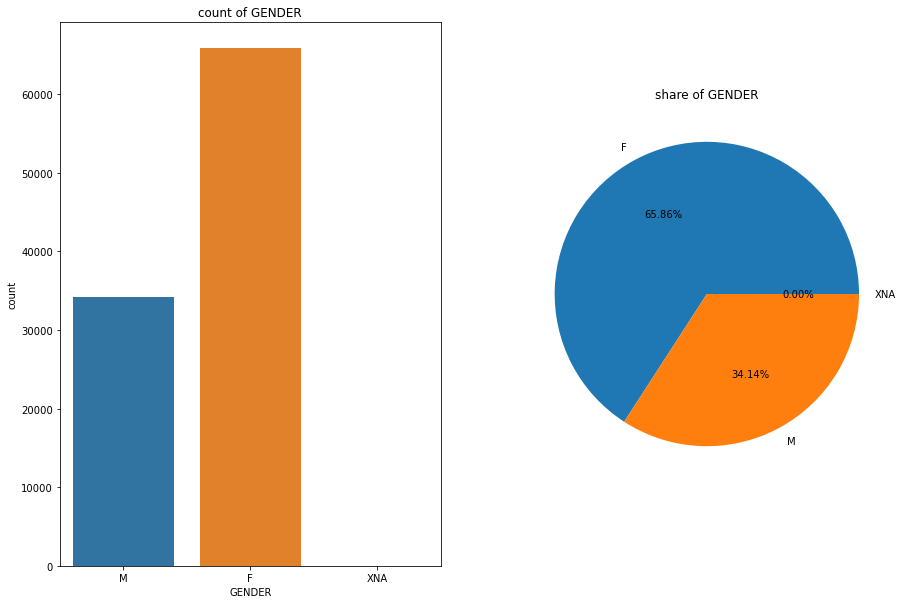

In [137]:
catdet('GENDER') # gender

Unique values in Car are: ['N' 'Y']
Most recurring value in Car is N
Number of missing values in Car are 0


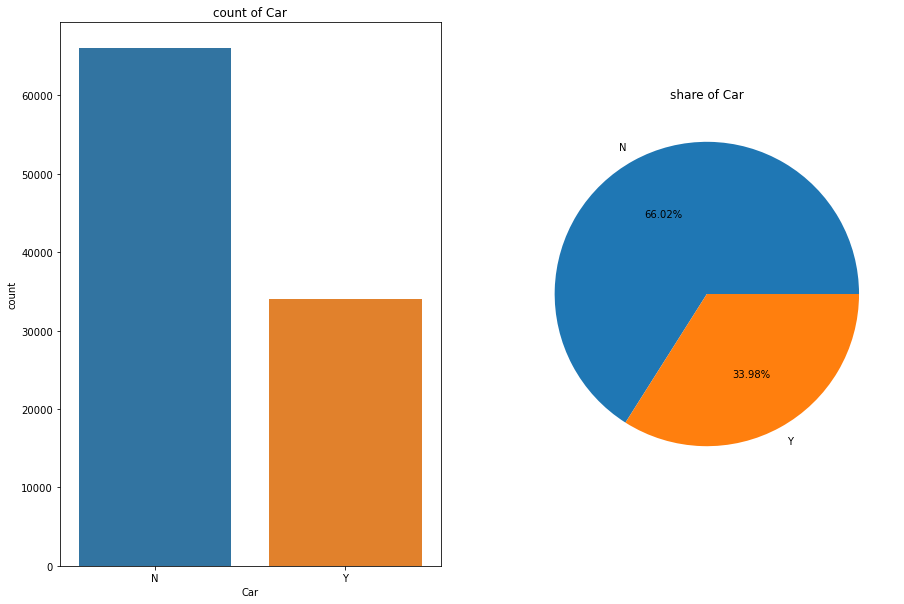

In [138]:
catdet('Car') # car

Mean of AMT_CREDIT is 599003.4465
Median of the AMT_CREDIT is 513040.5
Mode of the AMT_CREDIT is 599003.4465
Standard deviation of the AMT_CREDIT is 402051.9591213264
Number of missing values in AMT_CREDIT are 0


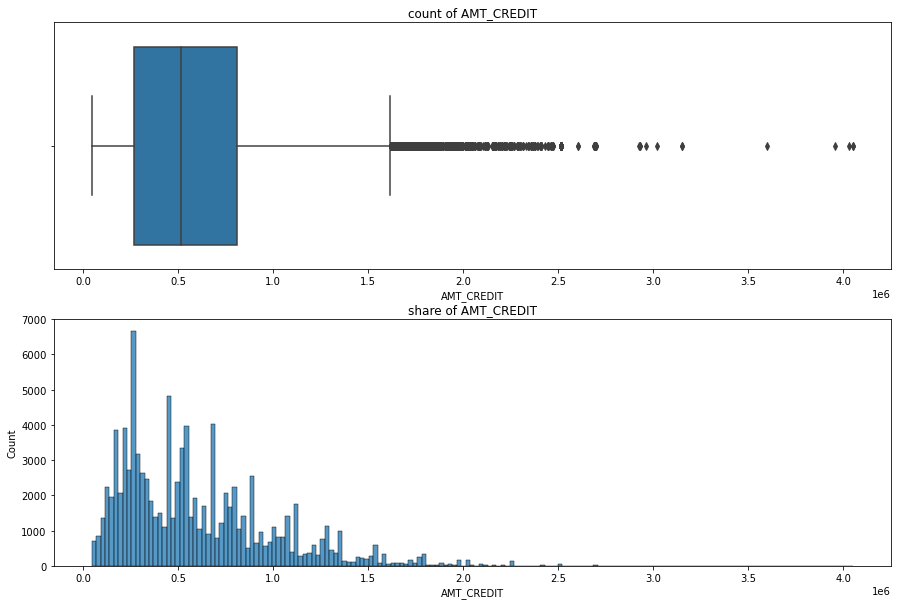

In [139]:
condet('AMT_CREDIT') # credit amount

Mean of AMT_GOODS_PRICE is 538345.1489706662
Median of the AMT_GOODS_PRICE is 450000.0
Mode of the AMT_GOODS_PRICE is nan
Standard deviation of the AMT_GOODS_PRICE is 369397.7246421765
Number of missing values in AMT_GOODS_PRICE are 81


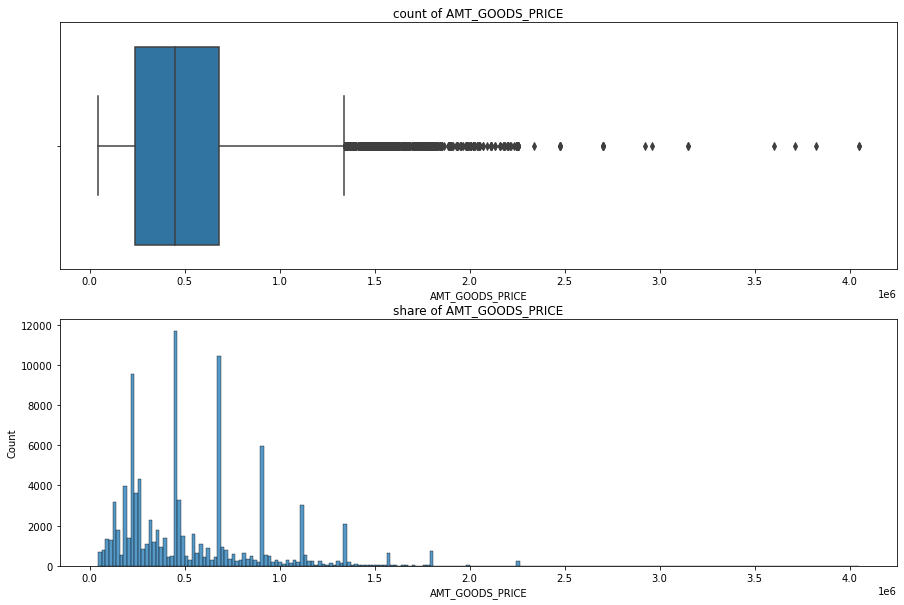

In [140]:
condet('AMT_GOODS_PRICE') # AMT_GOODS_PRICE

###### Bivariate (Level 2)

In [108]:
def catcont(col1,col2):

    fig, ax = plt.subplots(1,2,figsize=(15,7))
    a = sns.countplot(x=df[col1], hue=df[col2], ax=ax[0])
    for i in a.patches:
        percentage = f"{round(((i.get_height())/len(df))*100,2)}%"
        x = i.get_x() + i.get_width()/2
        y = i.get_height()
        a.annotate(percentage, (x,y),va='bottom',ha='center')

    data= df[col1].value_counts()
    labels =  data.keys()   
    
    ax[1].pie(data,labels =labels,autopct="%0.2f%%");

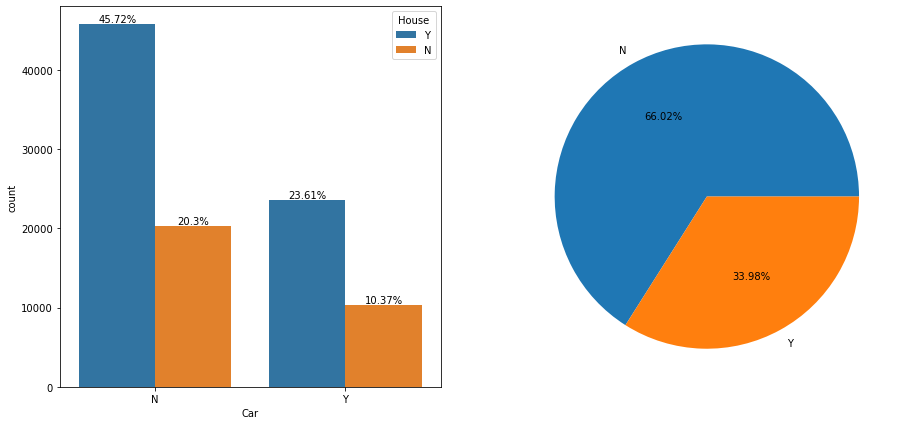

In [141]:
catcont('Car','House') # car and house

###### 
23.61% of customers owns both car and a house, 
20.3% own neither a house or a car

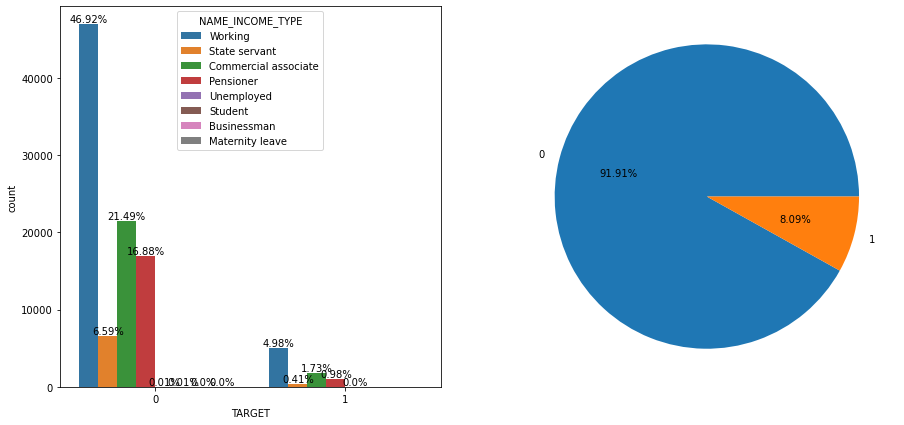

In [142]:
catcont('TARGET', 'NAME_INCOME_TYPE') # target and income type

###### 
Working customers are more likely to repay the loan.

8.09% of all customers are likely to default

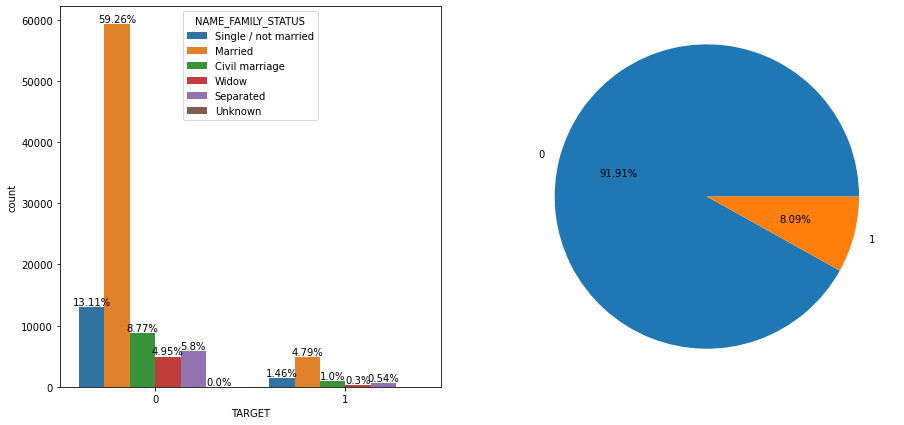

In [143]:
catcont('TARGET', 'NAME_FAMILY_STATUS') # target and family status

###### 
 
Customers who are married are most likely to replay the loan

###### Multivariate (level 3)

In [116]:
def c(col1, col2, col3):
    fig , ax = plt.subplots(1,2,figsize=(10,8))
    df.groupby(by=[col1,col2]).agg({col3:{'mean','median'}}).plot(kind='bar',ax=ax[0]);
    sns.countplot(x=df[col1],hue=df[col2],ax=ax[1])


In [130]:
#sns.catplot(data = df,x = 'TARGET', kind = 'count', row ='House', col='GENDER')

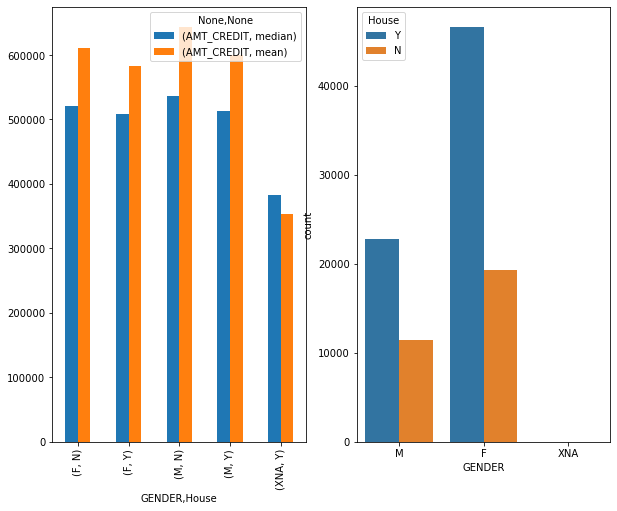

In [129]:
c('GENDER', 'House', 'AMT_CREDIT')

###### 

People, especially Females who owns a house have a higher credit

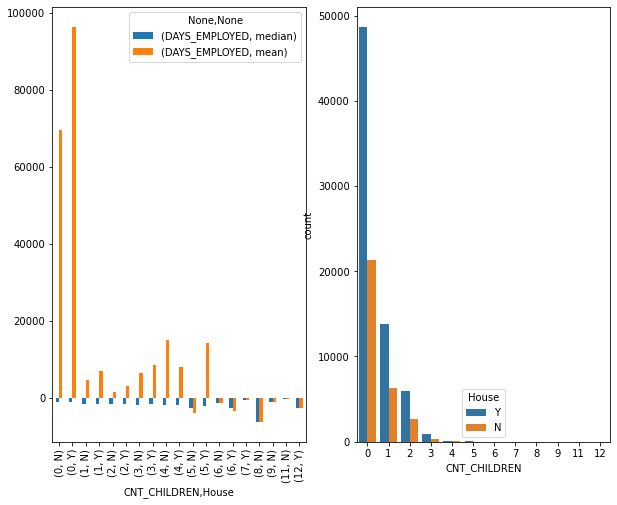

In [132]:
c('CNT_CHILDREN', 'House', 'DAYS_EMPLOYED')

###### 
Most people who owns a house and are employed have no children

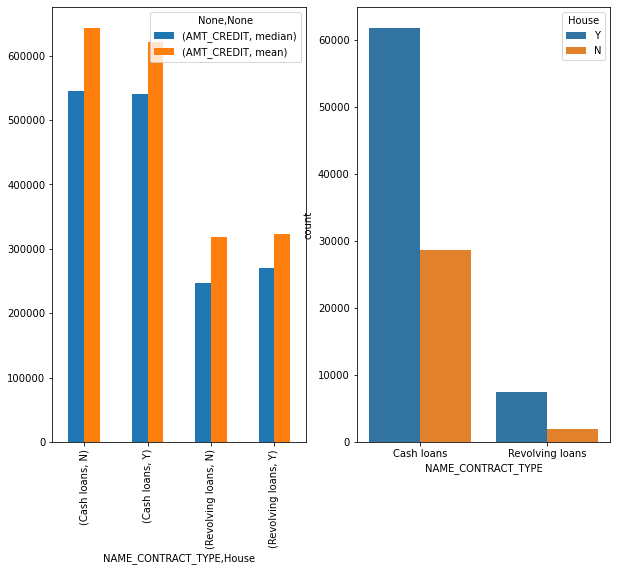

In [135]:
c('NAME_CONTRACT_TYPE', 'House', 'AMT_CREDIT')

###### 
People who owns a house are more likely to get a cash loan